In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv(r'C:\Users\Abdullah\Desktop\Group ONE_Elderly fall prediction\Group ONE_Elderly fall prediction\cStick.csv')
data

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0
...,...,...,...,...,...,...,...
2034,5.655,2.0,116.310,162.242,71.310,1.0,2
2035,9.660,2.0,124.320,177.995,79.320,1.0,2
2036,15.220,1.0,93.828,40.440,82.610,1.0,1
2037,9.120,2.0,123.240,175.871,78.240,1.0,2


In [58]:
data.shape

(2039, 7)

In [59]:
data.head()

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0


In [60]:
column = ['distance', 'pressure', 'HRV', 'sugarlevel', 'spo2', 'accelerometer', 'decision']
data.columns = column
data

,distance,pressure,HRV,sugarlevel,spo2,accelerometer,decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0
...,...,...,...,...,...,...,...
2034,5.655,2.0,116.310,162.242,71.310,1.0,2
2035,9.660,2.0,124.320,177.995,79.320,1.0,2
2036,15.220,1.0,93.828,40.440,82.610,1.0,1
2037,9.120,2.0,123.240,175.871,78.240,1.0,2


In [61]:
data['decision'].unique()

array([1, 2, 0], dtype=int64)

In [62]:
data.isna().sum()

distance         0
pressure         0
HRV              0
sugarlevel       0
spo2             0
accelerometer    0
decision         0
dtype: int64

<Axes: >

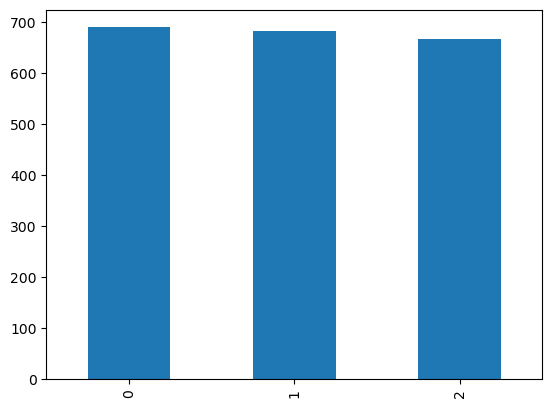

In [63]:
data['decision'].value_counts().plot(kind='bar')

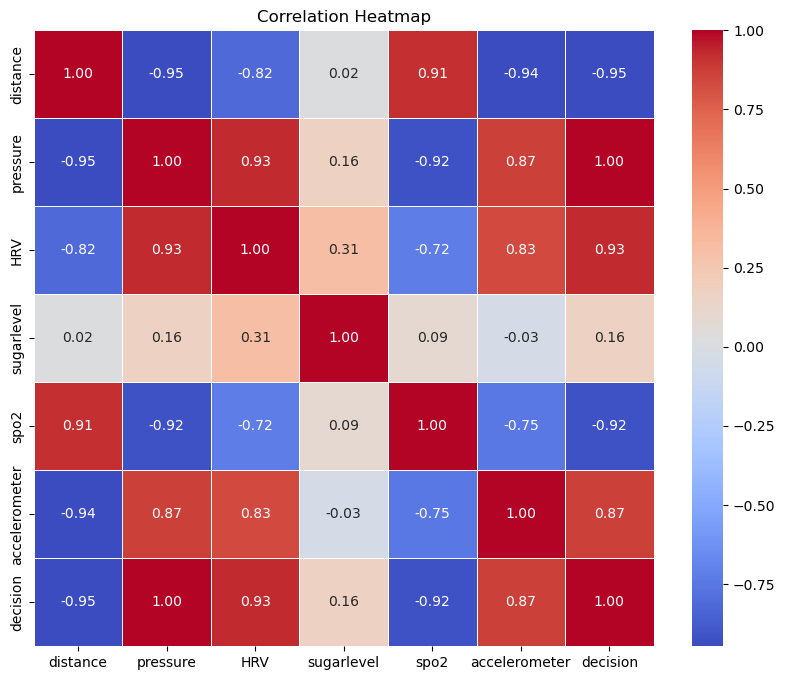

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


X = data.drop('decision', axis=1)
y = data['decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

predictions = logreg.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

print('Classification Report:')
print(classification_report(y_test, predictions))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       128
           2       1.00      1.00      1.00       138

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



C:\Users\Abdullah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


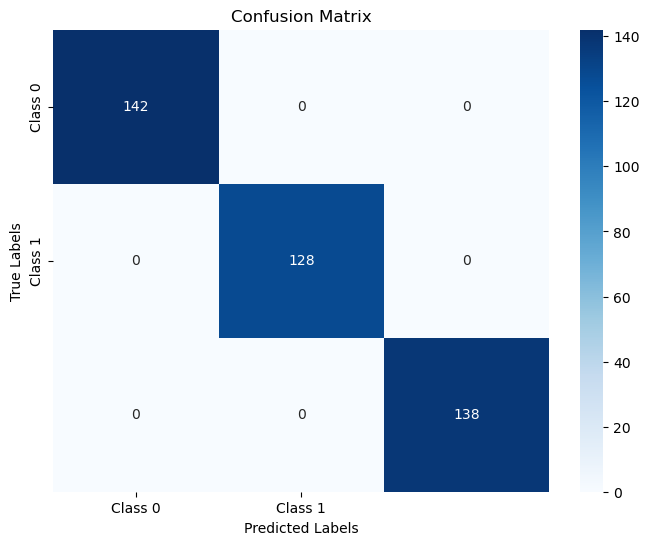

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model
svm_classifier = SVC()

# Train the model using the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
svm_predictions = svm_classifier.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print('SVM Accuracy:', svm_accuracy)

# Generate a classification report for SVM
print('SVM Classification Report:')
print(classification_report(y_test, svm_predictions))

SVM Accuracy: 1.0
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       128
           2       1.00      1.00      1.00       138

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



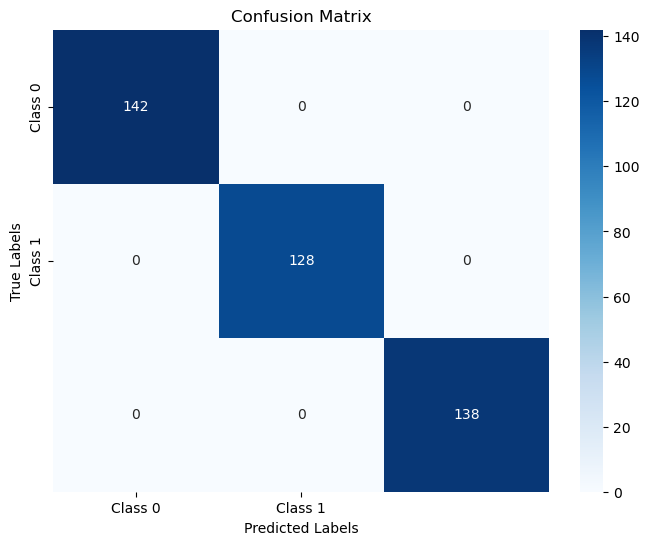

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN model with, for example, 5 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
knn_predictions = knn_classifier.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print('KNN Accuracy:', knn_accuracy)

# Generate a classification report for KNN
print('KNN Classification Report:')
print(classification_report(y_test, knn_predictions))


KNN Accuracy: 1.0
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       128
           2       1.00      1.00      1.00       138

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



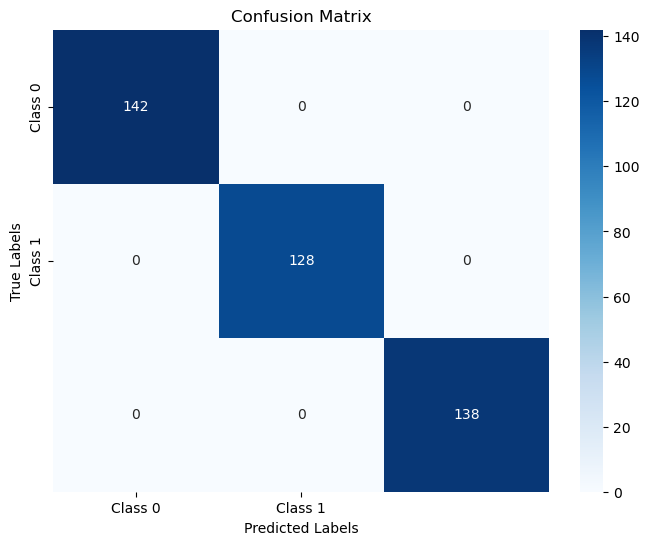

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes model
naive_bayes_classifier = GaussianNB()

# Train the model using the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
naive_bayes_predictions = naive_bayes_classifier.predict(X_test)

# Calculate accuracy
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
print('Naive Bayes Accuracy:', naive_bayes_accuracy)

# Generate a classification report for Naive Bayes
print('Naive Bayes Classification Report:')
print(classification_report(y_test, naive_bayes_predictions))


Naive Bayes Accuracy: 1.0
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       128
           2       1.00      1.00      1.00       138

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



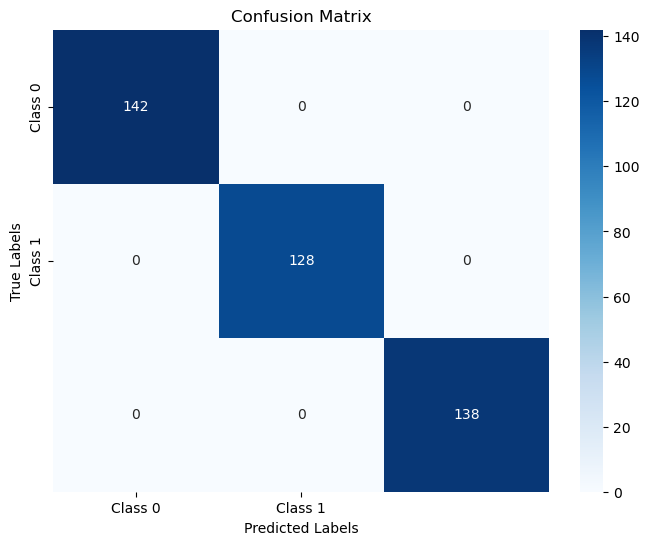

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [74]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier 

num_folds = 5  

classifier = RandomForestClassifier(n_estimators=100)  

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)  

cv_scores = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')  

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}".format(cv_scores.mean()))

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.00
